<a href="https://colab.research.google.com/github/Harshavardhan88/CodSoft/blob/main/CodSoft_Internship_Program_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
df_test = pd.read_csv('test_data.txt', sep=":::", header = 0 , engine = 'python')
df_train = pd.read_csv('train_data.txt', sep=":::", header = 0 , engine = 'python')
df_train.columns = ['SN', 'Movie_Name', 'Genre', 'Plot']
df_test.columns = ['SN', 'Movie_Name' , 'Plot']
df_test.head()

,SN,Movie_Name,Plot
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [ ]:
df_train.head()

,SN,Movie_Name,Genre,Plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   Movie_Name  54199 non-null  object
 2   Plot        54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54213 non-null  int64 
 1   Movie_Name  54213 non-null  object
 2   Genre       54213 non-null  object
 3   Plot        54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [ ]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [ ]:
df_test.isnull().sum()

,0
SN,0
Movie_Name,0
Plot,0


In [ ]:
df_train.isnull().sum()

,0
SN,0
Movie_Name,0
Genre,0
Plot,0


In [ ]:
df_train.count()

,0
SN,54213
Movie_Name,54213
Genre,54213
Plot,54213


In [ ]:
df_test.count()

,0
SN,54199
Movie_Name,54199
Plot,54199


In [ ]:
df_train.iloc[0:3]

,SN,Movie_Name,Genre,Plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [ ]:
df_train.loc[0]

,0
SN,2
Movie_Name,Cupid (1997)
Genre,thriller
Plot,A brother and sister with a past incestuous r...


In [ ]:
df_test.shape

(54199, 3)

In [ ]:
df_train.shape

(54213, 4)

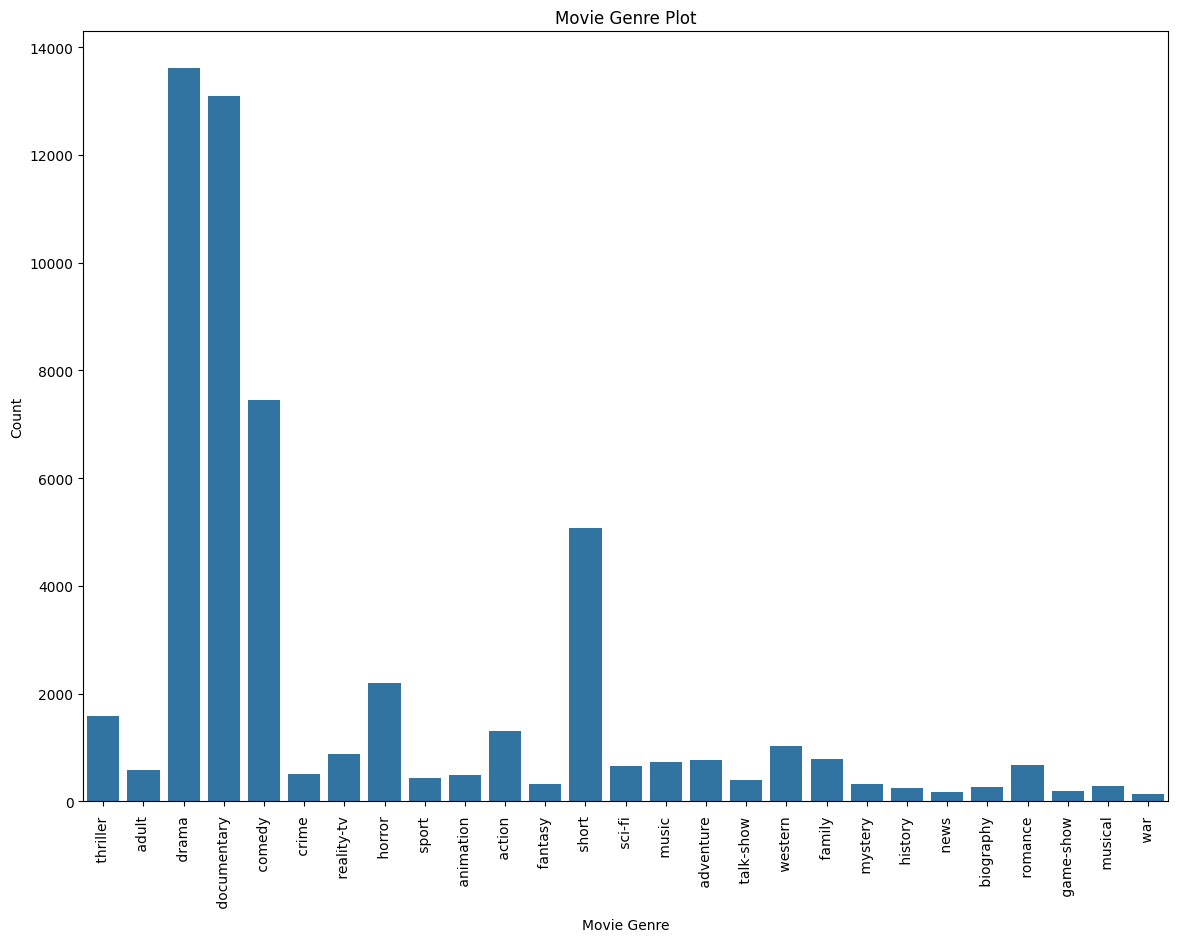

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x='Genre', data=df_train)
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

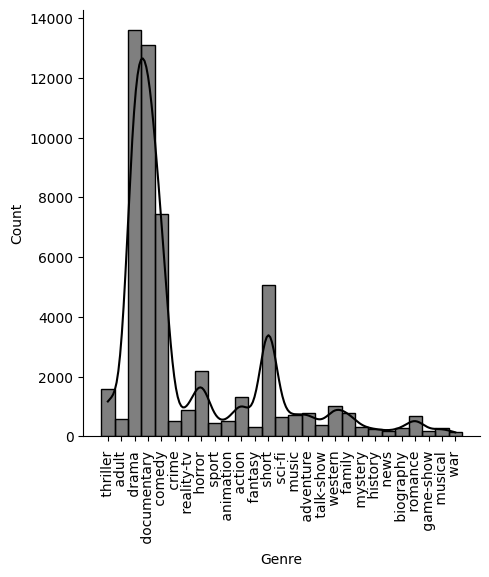

In [ ]:
sns.displot(df_train.Genre, kde =True, color = "black")
plt.xticks(rotation=90);

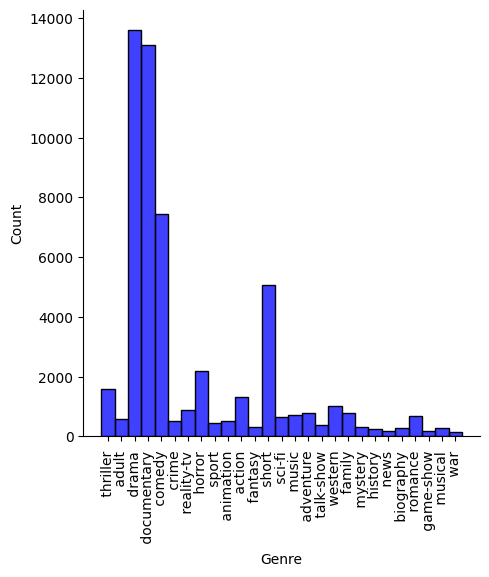

In [ ]:
sns.displot(df_train.Genre, kde=False, color = "blue")
plt.xticks(rotation=90);

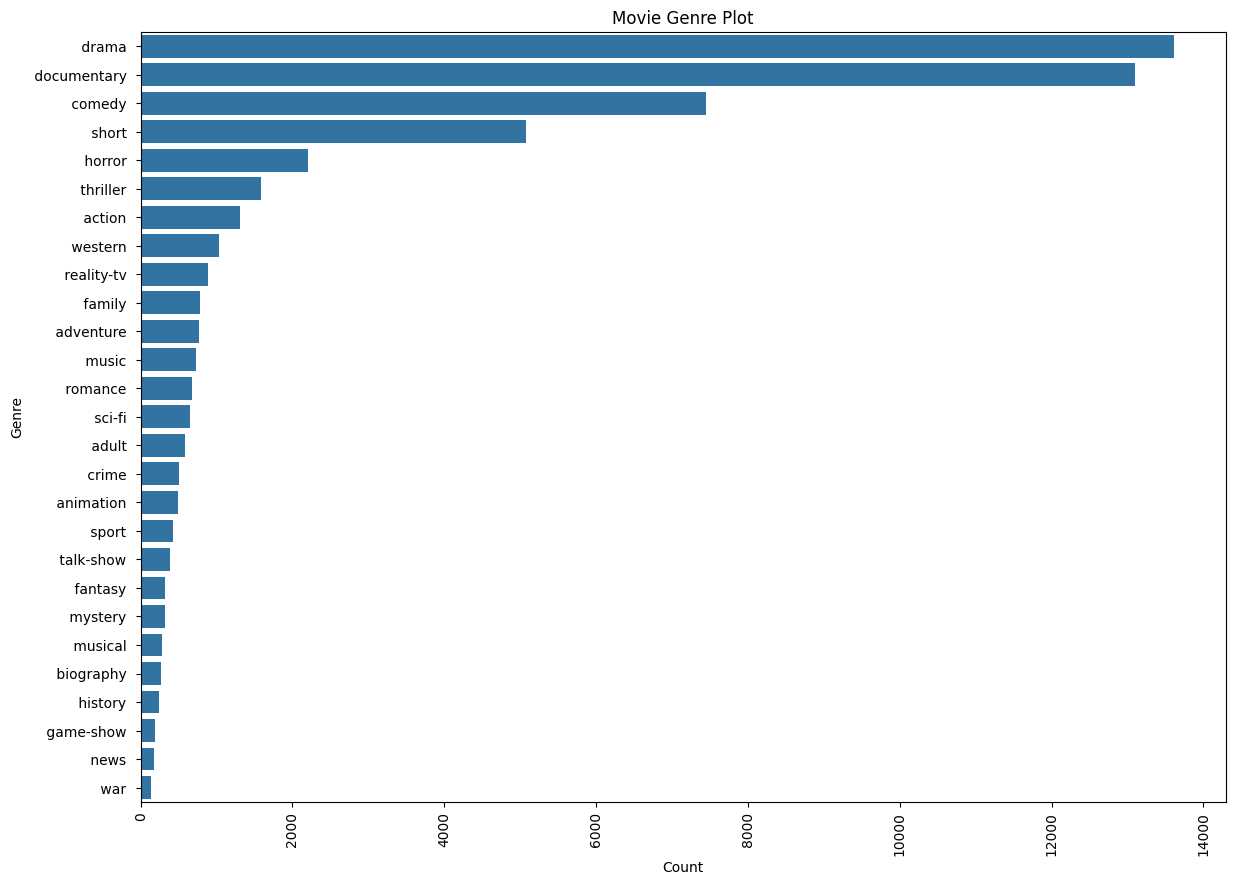

In [ ]:
plt.figure(figsize = (14,10))
count1 = df_train.Genre.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

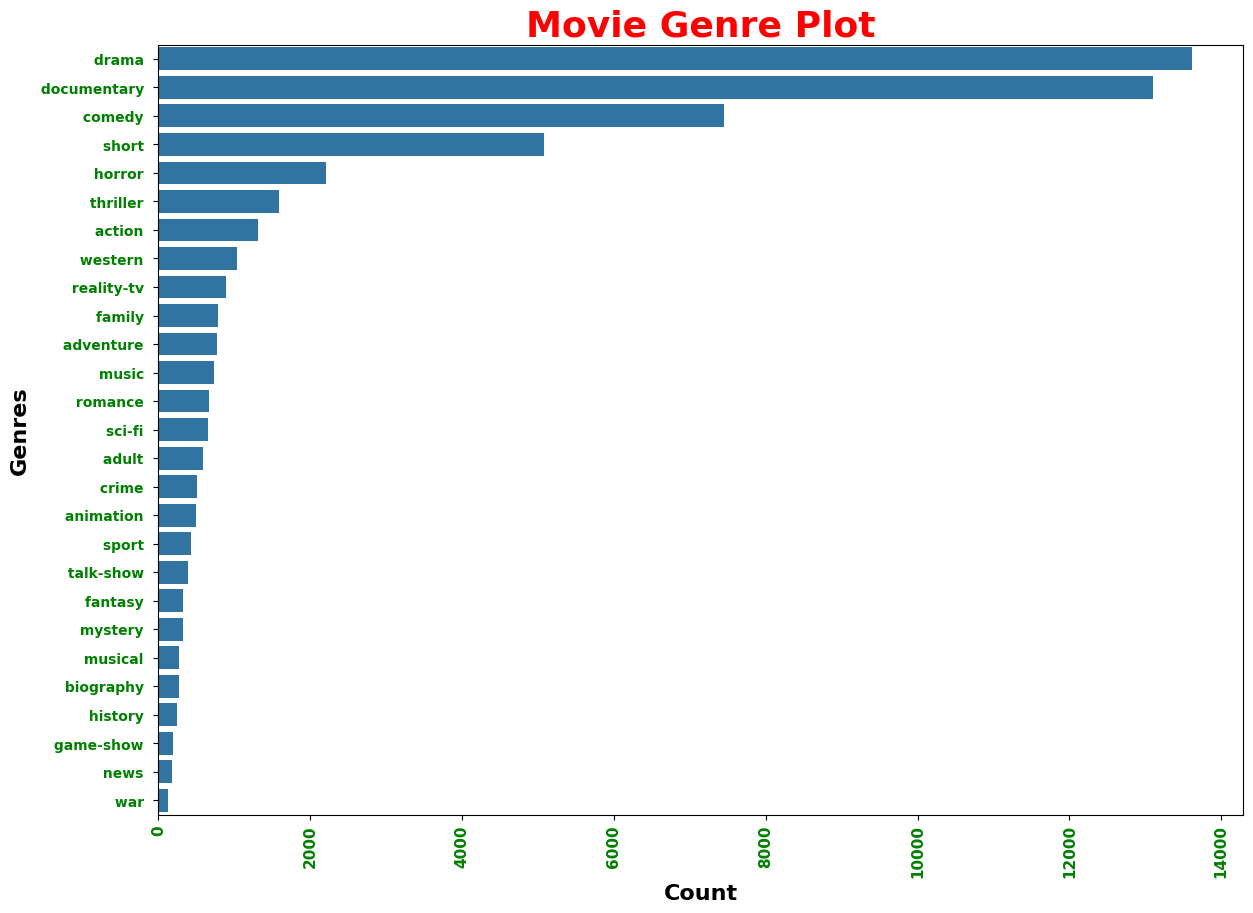

In [ ]:
plt.figure(figsize = (14,10))
count1 = df_train.Genre.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 16, fontweight = 'bold')
plt.ylabel('Genres', fontsize = 16, fontweight = 'bold')
plt.title('Movie Genre Plot', fontsize = 26, fontweight = 'bold', color = 'red')
plt.xticks(rotation=90, fontsize = 11, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'green')
plt.show()

In [ ]:
df_combined = pd.concat([df_train, df_test], axis = 0)
df_combined.head()

,SN,Movie_Name,Genre,Plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [ ]:
df_combined.shape
df_combined.size
df_combined.isnull().any()
df_combined.count()
encoder = LabelEncoder()
df_combined["Genre"] = encoder.fit_transform(df_combined["Genre"].values)
encoder = LabelEncoder()
df_combined["Movie_Name"] = encoder.fit_transform(df_combined["Movie_Name"].values)

In [ ]:
df_combined.head()

,SN,Movie_Name,Genre,Plot
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [ ]:
df_combined.Genre = df_combined.Genre.fillna(df_combined.Genre.mean())
df_combined.count()

,0
SN,108412
Movie_Name,108412
Genre,108412
Plot,108412


In [ ]:
df_combined.duplicated().values.any()

False

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_combined["Plot"])
df_combined.head()

,SN,Movie_Name,Genre,Plot
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [ ]:
y = df_combined["Genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_predictions = naive_bayes_model.predict(X_test)
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions, zero_division=1))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))

Naive Bayes Model:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0     0     0     0 

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_regression_model.predict(X_test)

In [ ]:
lr_predictions = logistic_regression_model.predict(X_test)
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions, zero_division=1))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))

Logistic Regression Model:
[[   2    0    0    0    0    0    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0  251]
 [   0    3    0    0    0    2    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  121]
 [   0    1    0    0    0    1    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  143]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0   87]
 [   0    0    0    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   39]
 [   0    0    0    0    0  102    0    1   17    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0 1367]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    0
     0    0    0    0    0    0